In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [4]:
class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()

In [5]:
layer = CenteredLayer()
layer(torch.tensor([1.0, 2, 3, 4, 5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [6]:
net = nn.Sequential(nn.LazyLinear(128), CenteredLayer())

In [7]:
Y = net(torch.rand(4, 8))
Y.mean()

tensor(4.6566e-09, grad_fn=<MeanBackward0>)

In [8]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units))
        self.bias = nn.Parameter(torch.randn(units,))

    def forward(self, X):
        linear = X @ self.weight.data + self.bias.data
        return F.relu(linear)

In [9]:
linear = MyLinear(5, 3)
linear.weight

Parameter containing:
tensor([[ 0.5284, -1.6177,  1.9372],
        [-1.1869, -0.0285,  1.3194],
        [-0.8462,  0.2300, -0.4551],
        [-1.1780,  0.6854,  0.3507],
        [ 1.6118, -1.1921,  1.2216]], requires_grad=True)

In [10]:
linear(torch.rand(2, 5))

tensor([[0.3993, 0.0000, 2.3087],
        [1.5620, 0.0000, 2.5329]])

In [12]:
net = nn.Sequential(MyLinear(64, 8), MyLinear(8, 1))
net(torch.rand(2, 64))

tensor([[0.8683],
        [4.5221]])

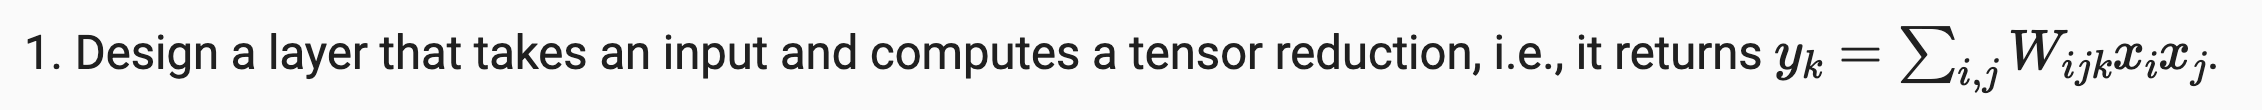

In [16]:
class TensorReductionLayer(nn.Module):
    def __init__(self, in_units, out_units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(out_units, in_units, in_units) * 0.1)
    
    def forward(self, X):
        # X shape: [Batch, In_Features]
        # Weight shape: [Out_Features, In_Features, In_Features]
        
        # We use Einstein Summation to perform the quadratic form: 
        # b = batch, i = first input index, j = second input index, k = output unit
        # This is equivalent to: y_bk = sum_{i,j} X_bi * W_kij * X_bj
        return torch.einsum('bi,kij,bj->bk', X, self.weight, X)

In [19]:
X = torch.randn(20, 5)
model = TensorReductionLayer(5, 10)

model(X).shape

torch.Size([20, 10])